# Analyzing exam scores

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

### Before answering these questions, we will import the data and have a look at it:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

exams_df = pd.read_csv('data/exams.csv')
exams_df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. What are the average reading scores for students with/without the test preparation course?

### Let's group the data by "test_prep_course" to answer this question:

In [2]:
prep_reading_df = exams_df.groupby('test_prep_course')['reading'].mean().to_frame().reset_index()
print(prep_reading_df)

  test_prep_course    reading
0        completed  73.893855
1             none  66.534268


### We found that the average reading score for the students with the test preparation course is aproximately 73 and for the students without the course is aproximately 67!

## 2. What are the average scores for the different parental education levels?

### We can do the same thing we did last question and group by the column specified:

In [3]:
parental_education_average_df = exams_df.groupby('parent_education_level')[['math', 'reading', 'writing']].mean().reset_index()
print(parental_education_average_df)

  parent_education_level       math    reading    writing
0     associate's degree  67.882883  70.927928  69.896396
1      bachelor's degree  69.389831  73.000000  73.381356
2            high school  62.137755  64.704082  62.448980
3        master's degree  69.745763  75.372881  75.677966
4           some college  67.128319  69.460177  68.840708
5       some high school  63.497207  66.938547  64.888268


## 3. Create plots to visualize findings for questions 1 and 2.

### For the first question we will create a bar plot that show the difference in reading scores between taking or not the preparation course:

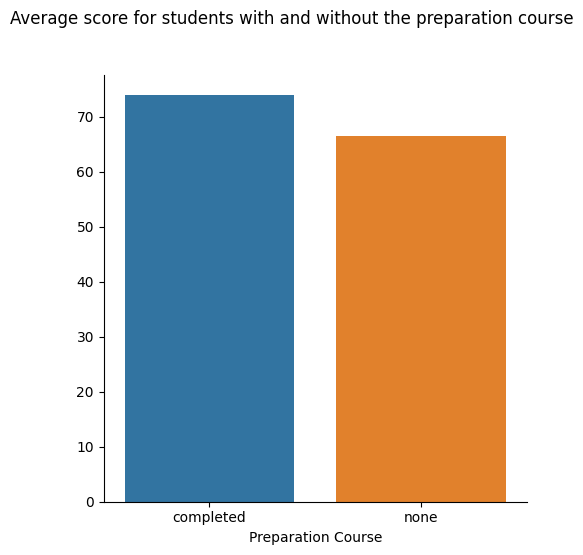

In [4]:
prep_reading_plt = sns.catplot(x='test_prep_course', y='reading', data=prep_reading_df, kind='bar')
prep_reading_plt.set(xlabel='Preparation Course', ylabel=None)
prep_reading_plt.fig.suptitle('Average score for students with and without the preparation course', y=1.1)
plt.show()

### For question two we will change the dataframe so we can plot the relationship between the parental education level and the average score of the students subploted by test type:

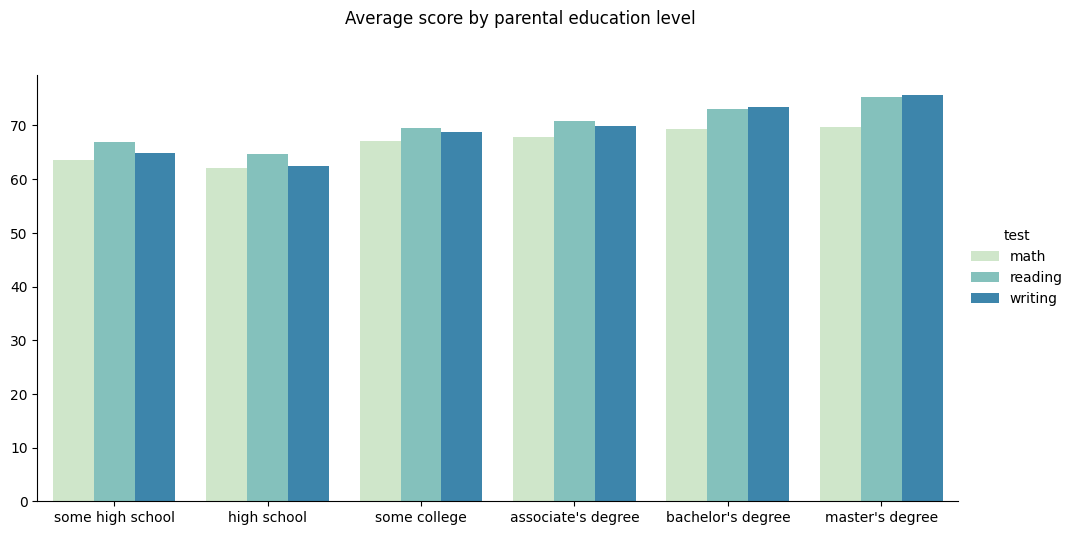

In [5]:
parental_education_average_melted_df = pd.melt(parental_education_average_df, id_vars="parent_education_level", var_name="test", value_name="average_score")

education_order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

parental_education_average_plt = sns.catplot(x='parent_education_level', y='average_score', hue='test', data=parental_education_average_melted_df, kind='bar', order=education_order, aspect=2, palette='GnBu')
parental_education_average_plt.fig.suptitle('Average score by parental education level', y=1.1)
parental_education_average_plt.set(xlabel=None, ylabel=None)
plt.show()

## 4. Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

### We can group the dataframe by preparation and parental education level and analyze the data:

   test_prep_course parent_education_level       math    reading    writing
0         completed     associate's degree  71.829268  76.170732  76.817073
1         completed      bachelor's degree  73.282609  76.739130  78.695652
2         completed            high school  65.000000  67.839286  68.053571
3         completed        master's degree  70.600000  78.250000  80.100000
4         completed           some college  71.454545  75.987013  76.519481
5         completed       some high school  66.701299  70.948052  70.363636
6              none     associate's degree  65.571429  67.857143  65.842857
7              none      bachelor's degree  66.902778  70.611111  69.986111
8              none            high school  60.992857  63.450000  60.207143
9              none        master's degree  69.307692  73.897436  73.410256
10             none           some college  64.892617  66.087248  64.872483
11             none       some high school  61.078431  63.911765  60.754902


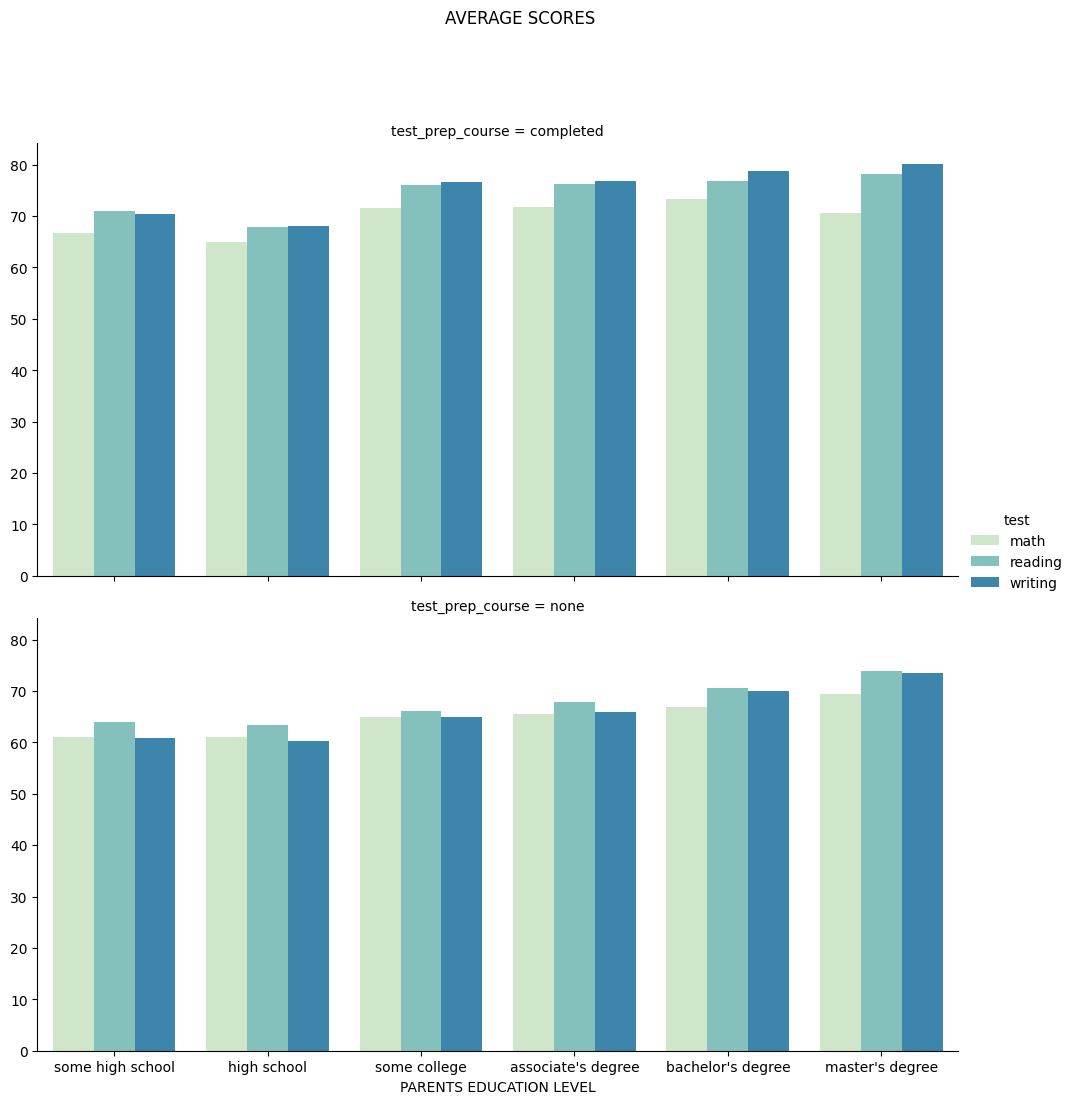

In [6]:
prep_parents_scores_df = exams_df.groupby(['test_prep_course', 'parent_education_level'])[['math', 'reading', 'writing']].mean().reset_index()
print(prep_parents_scores_df)

prep_parents_scores_melted_df = pd.melt(prep_parents_scores_df, id_vars=['test_prep_course', 'parent_education_level'], var_name='test', value_name='average_score')
prep_parents_scores_melted_df

prep_parents_scores_plt = sns.catplot(x='parent_education_level', y='average_score', hue='test', row='test_prep_course', data=prep_parents_scores_melted_df, kind='bar', order=education_order, aspect=2, palette='GnBu')
prep_parents_scores_plt.fig.suptitle('AVERAGE SCORES', y=1.1)
prep_parents_scores_plt.set(xlabel='PARENTS EDUCATION LEVEL', ylabel=None)
plt.show()

### We can see that the parents education level has a small correlation with the tests scores for both groups of students. But we can notice that for the students without the preparation course the parents education level has a more uniform influence.

## 5. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

### The correlation between scores can be investigated using plots and calculated values. Let's use both approaches:

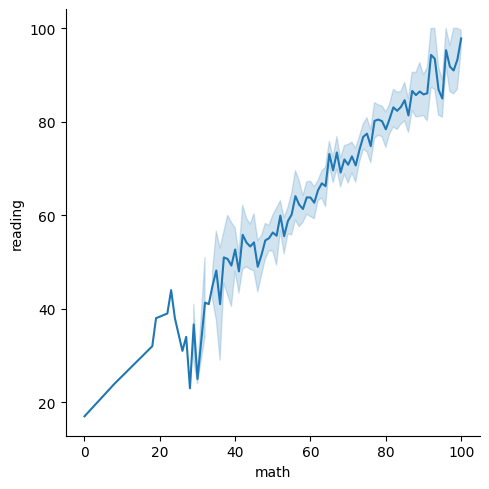

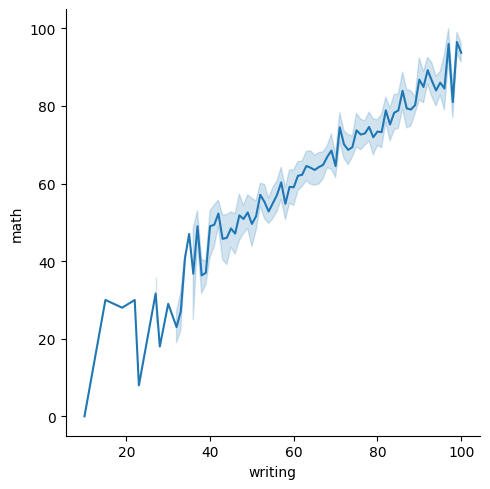

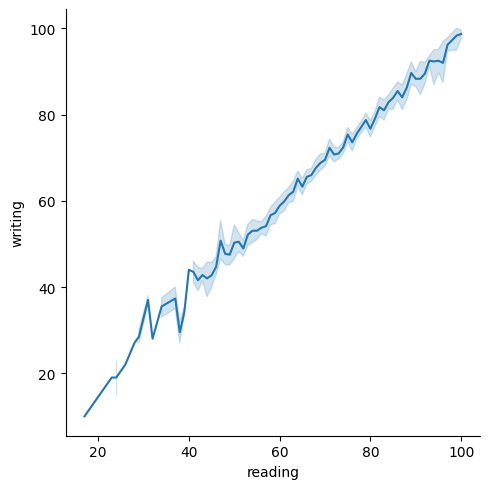

In [23]:
math_reading_plt = sns.relplot(x='math', y='reading', data=exams_df, kind='line')
plt.show()

writing_math_plt = sns.relplot(x='writing', y='math', data=exams_df, kind='line')
plt.show()

reading_writing_plt =sns.relplot(x='reading', y='writing', data=exams_df, kind='line')
plt.show()

### After seeing these plots we can guess that the subjects have some a good correlation, since the more a subject score increases, the other one appears to increase as well. Although, we notice that students with scores between 20 and 40 don't exactly have similar scores for the subjects. Dealing with precise values of correlation we have:  

In [18]:
math_reading_corr = exams_df['math'].corr(exams_df['reading'])
reading_writing_corr = exams_df['reading'].corr(exams_df['writing'])
writing_math_corr = exams_df['writing'].corr(exams_df['math'])

print("Correlation between math and reading: ", math_reading_corr)
print("Correlation between reading and writing: ", reading_writing_corr)
print("Correlation between writing and math: ", writing_math_corr)

Correlation between math and reading:  0.8175796636720544
Correlation between reading and writing:  0.9545980771462476
Correlation between writing and math:  0.8026420459498086


### As we suspected, the correlations are very high, close to 1. But since the principal only wants to know about the students who performed well, we will use this set of students:

In [22]:
exams_good_scores_df = exams_df[(exams_df['math'] > 70) | (exams_df['reading'] > 70) | (exams_df['writing'] > 70)]

math_reading_high_corr = exams_good_scores_df['math'].corr(exams_good_scores_df['reading'])
reading_writing_high_corr = exams_good_scores_df['reading'].corr(exams_good_scores_df['writing'])
writing_math_high_corr = exams_good_scores_df['writing'].corr(exams_good_scores_df['math'])

print("Correlation between math and reading: ", math_reading_high_corr)
print("Correlation between reading and writing: ", reading_writing_high_corr)
print("Correlation between writing and math: ", writing_math_high_corr)

Correlation between math and reading:  0.5673570455108374
Correlation between reading and writing:  0.8761001698988321
Correlation between writing and math:  0.509283188699178


### We are met with the surpising result that the correlation decreases when evaluating the higher scores! The correlations math-reading and writing-math went from 0.8 to 0.5. But does that mean the scores that don't correlate well with the good ones are bad? Let's take a look at the plots for the higher scores:

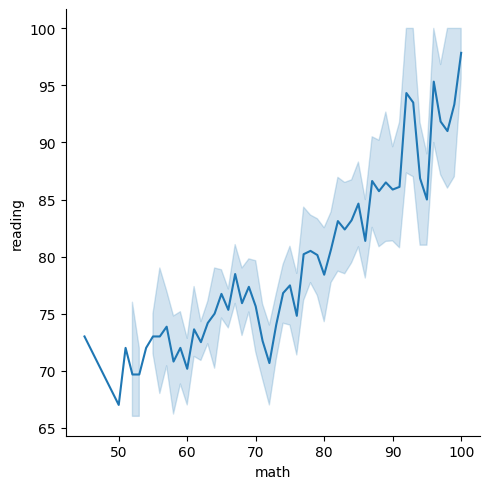

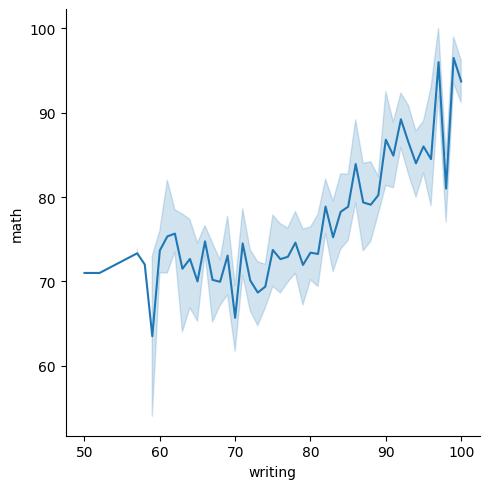

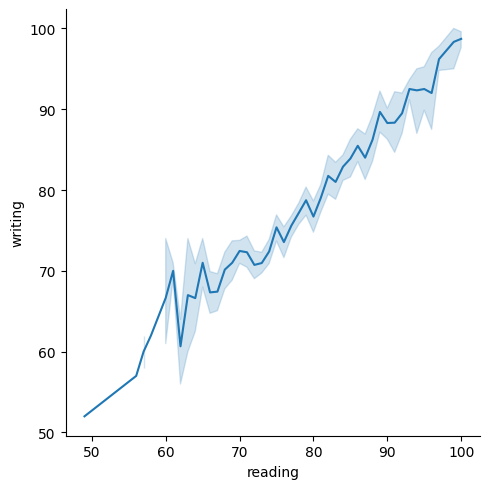

In [24]:
math_reading_high_plt = sns.relplot(x='math', y='reading', data=exams_good_scores_df, kind='line')
plt.show()

writing_math_high_plt = sns.relplot(x='writing', y='math', data=exams_good_scores_df, kind='line')
plt.show()

reading_writing_high_plt =sns.relplot(x='reading', y='writing', data=exams_good_scores_df, kind='line')
plt.show()

### There we go! We can see that very little students that have a good score in one subject have bad scores in the other ones. So we can say tell the principal that students with a good score in one subject tend to have good scores in the other subjects.

### This project utilized some variables to analyze data that were required for answering the questions, like parents education level and whether they took the preparation course, but feel free to continue this work by considering the other variables available in the dataframe! 